In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/drive/My Drive/business analytics Python/salaries.csv')

In [ ]:
#1 Dataset overview

In [ ]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [ ]:
print(df)

         rank discipline  yrs.since.phd  yrs.service   sex  salary
0        Prof          B             19           18  Male  139750
1        Prof          B             20           16  Male  173200
2    AsstProf          B              4            3  Male   79750
3        Prof          B             45           39  Male  115000
4        Prof          B             40           41  Male  141500
..        ...        ...            ...          ...   ...     ...
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   81035

[397 rows x 6 columns]


In [ ]:
target_variable = "Salary"
print(f"\nTarget Variable: {target_variable}")


Target Variable: Salary


In [ ]:
#2 Check for missing values

In [ ]:
print(df.isnull().sum())

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64


In [ ]:
#3 Convert categorical variables

In [ ]:
df = pd.get_dummies(df, columns=['rank', 'discipline', 'sex'], drop_first=True)
df = df.astype(int)

In [ ]:
print(df)

     yrs.since.phd  yrs.service  salary  rank_AsstProf  rank_Prof  \
0               19           18  139750              0          1   
1               20           16  173200              0          1   
2                4            3   79750              1          0   
3               45           39  115000              0          1   
4               40           41  141500              0          1   
..             ...          ...     ...            ...        ...   
392             33           30  103106              0          1   
393             31           19  150564              0          1   
394             42           25  101738              0          1   
395             25           15   95329              0          1   
396              8            4   81035              1          0   

     discipline_B  sex_Male  
0               1         1  
1               1         1  
2               1         1  
3               1         1  
4               1    

In [ ]:
#4 Correlation analysis

m

Text(0.5, 1.0, 'Correlation Matrix')

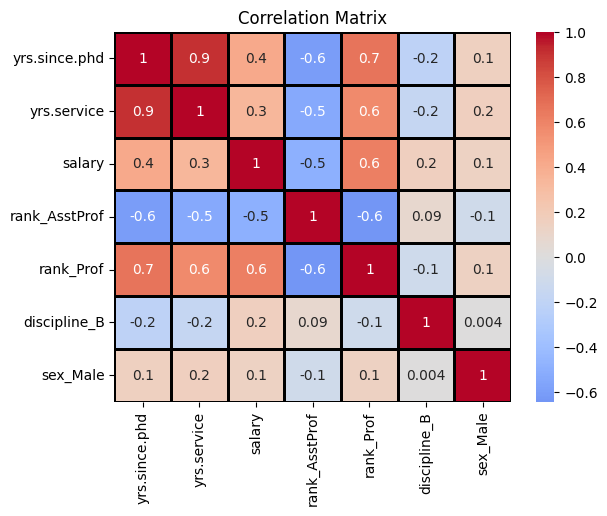

In [ ]:
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = "coolwarm",
            linewidths = 1,
            linecolor = 'black')
plt.title('Correlation Matrix')

In [ ]:
#5 Additional visualisation

In [ ]:
df= df.drop('yrs.service', axis=1)

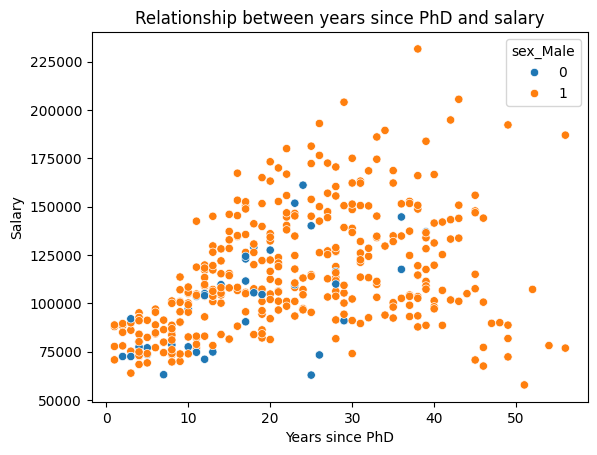

In [ ]:
sns.scatterplot(data=df, x='yrs.since.phd', y='salary', hue='sex_Male')
plt.title('Relationship between years since PhD and salary')
plt.xlabel('Years since PhD')
plt.ylabel('Salary')
plt.show()
#plus t'as d'exopérience plus t'es payé, nv homme femme peu de diff mais

In [ ]:
#6 Multilinear reg model : preprocessing

In [ ]:
X = df.drop('salary', axis=1)
y = df['salary']
numerical_features = ['yrs.since.phd']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [ ]:
#si tas 100, 20% pour test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm)
sm_results = sm_model.fit()
print(sm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     47.70
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           1.56e-36
Time:                        21:09:17   Log-Likelihood:                -3636.9
No. Observations:                 317   AIC:                             7286.
Df Residuals:                     311   BIC:                             7308.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.095e+04   5296.618     15.283

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_pred = sm_results.predict(X_test_sm)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 14408.272884212905


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 19356.68077530941


In [ ]:
#11 Fine-Tuning

In [ ]:
significant_vars = ['yrs.since.phd', 'rank_Prof', 'discipline_B', 'sex_Male']

X_train_sig = X_train[significant_vars]
X_test_sig = X_test[significant_vars]

X_train_sig_sm = sm.add_constant(X_train_sig)
X_test_sig_sm = sm.add_constant(X_test_sig)

model_sig = sm.OLS(y_train, X_train_sig_sm).fit()

print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     56.00
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           1.44e-35
Time:                        21:11:28   Log-Likelihood:                -3641.4
No. Observations:                 317   AIC:                             7293.
Df Residuals:                     312   BIC:                             7312.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.516e+04   4987.831     15.069

In [ ]:
y_pred_sig = model_sig.predict(X_test_sig_sm)

mae_sig = mean_absolute_error(y_test, y_pred_sig)
rmse_sig = np.sqrt(mean_squared_error(y_test, y_pred_sig))

print(f"MAE du modèle ajusté: {mae_sig}")
print(f"RMSE du modèle ajusté: {rmse_sig}")

MAE du modèle ajusté: 14761.62202790426
RMSE du modèle ajusté: 19438.76472497962


In [ ]:
#12Tree regression model

In [ ]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
importances = tree_regressor.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

         Feature  Importance
2      rank_Prof    0.548359
0  yrs.since.phd    0.332068
3   discipline_B    0.077462
1  rank_AsstProf    0.023375
4       sex_Male    0.018735


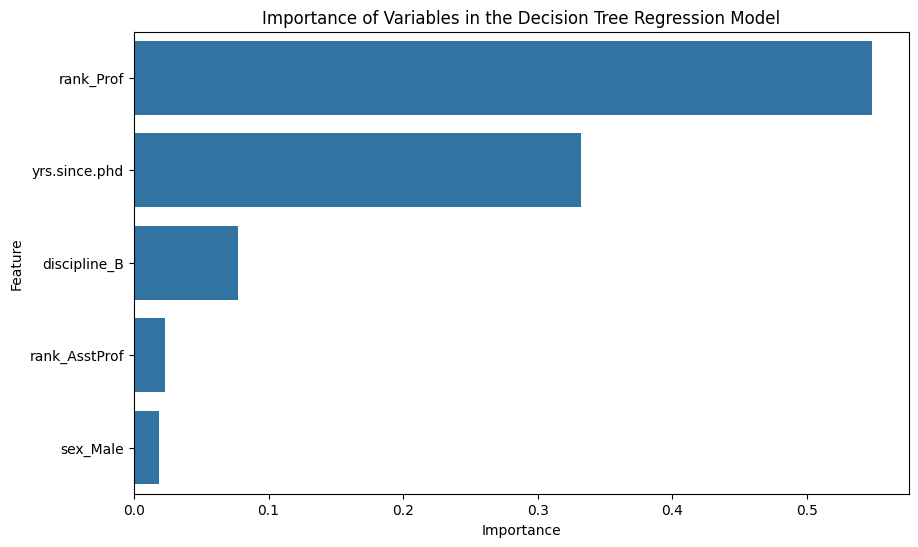

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importance of Variables in the Decision Tree Regression Model')
plt.show()

In [ ]:
y_pred_tree = tree_regressor.predict(X_test)

In [ ]:
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print(f"Mean Absolute Error (MAE) of regression model by tree: {mae_tree}")
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"Root Mean Squared Error (RMSE) of regression model by tree: {rmse_tree}")

Mean Absolute Error (MAE) of regression model by tree: 17670.604672619047
Root Mean Squared Error (RMSE) of regression model by tree: 26347.459908127028


In [ ]:
top_features = ['rank_Prof', 'yrs.since.phd', 'discipline_B']
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [ ]:
tree_regressor_top = DecisionTreeRegressor()
tree_regressor_top.fit(X_train_top, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_tree_top = tree_regressor_top.predict(X_test_top)

mae_tree_top = mean_absolute_error(y_test, y_pred_tree_top)
rmse_tree_top = np.sqrt(mean_squared_error(y_test, y_pred_tree_top))

print(f"Mean Absolute Error (MAE) du modèle affiné: {mae_tree_top}")
print(f"Root Mean Squared Error (RMSE) du modèle affiné: {rmse_tree_top}")

Mean Absolute Error (MAE) du modèle affiné: 17195.665863095237
Root Mean Squared Error (RMSE) du modèle affiné: 25737.8151880936


In [ ]:
#13 Random forest regression model

In [ ]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf = rf_regressor.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (MAE) of random forest regression model: {mae_rf}")
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Root Mean Squared Error (RMSE) of random forest regression model: {rmse_rf}")

Mean Absolute Error (MAE) of random forest regression model: 16388.642352063733
Root Mean Squared Error (RMSE) of random forest regression model: 23759.009109437713


In [ ]:
print("Model comparison :")
print("--------------------------------------------------")
print(f"Linear regression model - MAE : {mae:.2f}, RMSE : {rmse:.2f}")
print(f"Tree regression model- MAE : {mae_tree:.2f}, RMSE : {rmse_tree:.2f}")
print(f"Random forest regression model- MAE : {mae_rf:.2f}, RMSE : {rmse_rf:.2f}")

Model comparison :
--------------------------------------------------
Linear regression model - MAE : 14408.27, RMSE : 19356.68
Tree regression model- MAE : 17670.60, RMSE : 26347.46
Random forest regression model- MAE : 16388.64, RMSE : 23759.01
